In [2]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut
#!pip install git+https://github.com/DeepLabCut/DeepLabCut.git
!pip install --upgrade scikit-image
%reload_ext numpy
%reload_ext scipy
%reload_ext matplotlib
%reload_ext mpl_toolkits

!pip install git+https://github.com/aleju/imgaug.git

  Using cached scikit_image-0.18.1-cp39-cp39-manylinux1_x86_64.whl (28.9 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Using cached scikit_image-0.19.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.1
    Uninstalling scikit-image-0.18.1:
      Successfully uninstalled scikit-image-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.2.1 requires scikit-image<=0.18.1,>=0.17, but you have scikit-image 0.19.3 which is incompatible.
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-ca81sh90
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-ca81sh90
  Res

In [3]:
# Importing the toolbox (takes several seconds) 

import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt


In [4]:
#import plotly.express as px

In [5]:
# this is example data from the public project: https://github.com/AlexEMG/DeepLabCut/tree/master/examples/openfield-Pranav-2018-10-30
#video='snr turning_2537_f_Trial1.mp4'
video='snrbaseline_3901_f_Trial1.mp4'

#DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
#DLCscorer='snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000.h5'
DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

#Dataframe = pd.read_hdf('/content/drive/MyDrive/Pilot_v1_single_animal-Grant-2021-06-29/videos/SNR_LMO3vsLMO7/snr turning_2537_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400
Dataframe = pd.read_hdf('/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')
                           
                        
                        

In [6]:
#Let's have a look at the data:

#these structures are awesome to manipulate, how -->> see pandas https://pandas.pydata.org/pandas-docs/stable/index.html
Dataframe.tail(50)

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
44971                                             327.581116       39.743263   
44972                                             326.827301       39.743263   
44973                                             326.827301       39.743263   
44974                                             326.827301       39.672218   
44975                                             326.827301       39.672218   
44976                                             326.827301       39.658943   
44977                                             326.829620       39.672218   
44978                                             326.829620       39.715332   
44979                                             326.994324       39.739243   
44980                                             326.829620       39.739243   
44981                                             326.933411       39.739243   
44982                                             326.933411       39.810017   
44983                                             327.053131       39.810017   
44984                                             326.933411       39.721420   
44985                                             326.933411       39.721420   
44986                                             326.930878       39.669937   
44987                                             326.930878       39.618168   
44988                                             326.930878       39.618168   
44989                                             327.015625       39.653187   
44990                                             327.015625       39.618168   
44991                                             327.099670       39.600563   
44992                                             327.194153       39.653187   
44993                                             327.194153       39.666893   
44994                                             327.425201       39.469017   
44995                                             327.425201       39.666893   
44996                                             327.425201       39.666893   
44997                                             327.609070       39.672775   
44998                                             327.400818       39.672775   
44999                                             327.279266       39.672775   
45000                                             327.029297       39.549358   
45001                                             327.029297       39.672775   
45002                                             327.029297       39.814167   
45003                                             327.193481       39.924358   
45004                                             327.193481       39.964256   
45005                                             327.209137       39.964256   
45006                                             327.259979       39.924358   
45007                                             327.259979       39.824207   
45008                                             327.209137       39.701897   
45009                                             327.274689       39.302547   
45010                                             327.299377       39.302547   
45011                                             327.501892       39.749893   
45012                                             327.299377       39.556866   
45013                                             327.299377       39.749893   
45014                                             327.239227       39.841618   
45015                                             327.239227       39.873505   
45016                                             327.239227       39.841618   
45017                                             327.681091       39.873505   


In [7]:
#Removes the weird tail of 0.000000 values. Don't worry, it won't mess anything up - see the last frame
#  with real data and compare the index.
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                  16.335587       32.304123   
1                                                  16.467541       32.417416   
2                                                  16.491171       32.600456   
3                                                  16.491171       32.600456   
4                                                  16.740164       32.686348   
...                                                      ...             ...   
45016                                             327.239227       39.841618   
45017                                             327.681091       39.873505   
45018                                             327.681793       39.977539   
45019                                             327.681793       39.977539   
45020                                             327.681793       39.660614   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.149340  1126.465210  41.751762   0.023850    3.293753   
1           0.246842  1126.555176  41.751762   0.022840    3.618218   
2           0.179940  1127.084106  41.872337   0.070551    3.618218   
3           0.313029  1127.084106  42.276016   0.025804    3.396563   
4           0.640304  1127.517090  44.159752   0.091710    3.618218   
...              ...          ...        ...        ...         ...   
45016       0.999154  1128.872803  45.318493   0.992676  332.717407   
45017       0.999304  1128.872803  46.244175   0.995590  332.536591   
45018       0.999367  1128.872803  46.244175   0.993030  332.536560   
45019       0.999211  1128.872803  46.244175   0.995122  332.412506   
45020       0.999274  1128.841675  46.204170   0.994138  331.979187   

scorer                                         ...                            \
bodyparts                                  br  ... left_backpaw    tail_base   
coords              y likelihood            x  ...   likelihood            x   
0          489.578583   0.102480  1126.197632  ...     0.976362   505.173584   
1          489.684326   0.144502  1126.557495  ...     0.964247   505.173584   
2          489.750702   0.126053  1126.625977  ...     0.970517   505.173584   
3          489.841919   0.100322  1127.193604  ...     0.954993   502.986267   
4          489.841919   0.114440  1127.508301  ...     0.971660   502.745697   
...               ...        ...          ...  ...          ...          ...   
45016      688.755920   0.998304  1126.346802  ...     0.991175  1027.949341   
45017      688.755920   0.998822  1126.346802  ...     0.997399  1027.846924   
45018      688.755920   0.998052  1126.346802  ...     0.998242  1027.949341   
45019      688.631165   0.998836  1126.346802  ...     0.997937  1027.690308   
45020      687.867615   0.999290  1126.290649  ...     0.998258  1027.640625   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          655.024170   0.954958  301.615051  114.296112   0.643392   
1          655.024170   0.946298  301.740723  114.296112   0.759039   
2          655.024170   0.942785  301.823181  114.401611   0.870069   
3          653.262329   0.976676  301.823181  114.401611   0.836634   
4          652.633179   0.992352  302.098724  114.296112   0.958654   
...               ...        ...         ...         ...        ...   
45016       76.271812   0.999704  962.572937   49.230621   0.988124   
45017       76.271812   0.999766  962.821411   49.353

In [8]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

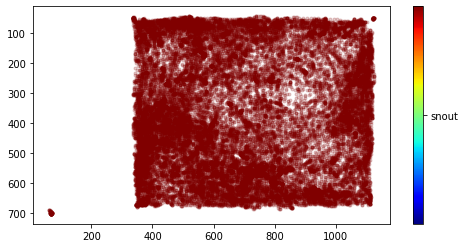

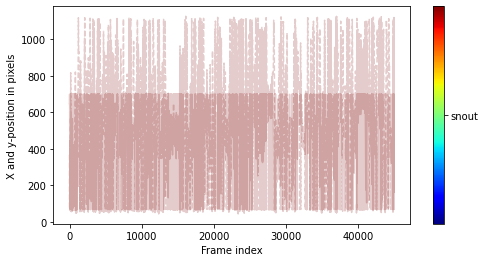

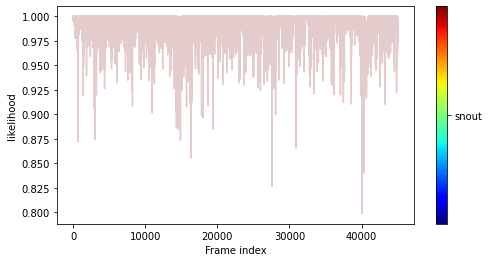

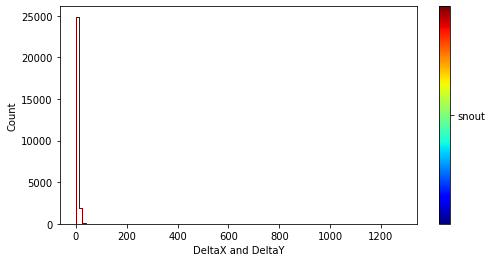

In [9]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot=['snout'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.9,fs=(8,4))

# These plots can are interactive and can be customized (see https://matplotlib.org/) [in the code above]
# note that the snout and other bpts jitter in this example that was not trained for long.

In [10]:
# store in other variables:
xsnout=Dataframe[DLCscorer][bpt]['x'].values
ysnout=Dataframe[DLCscorer][bpt]['y'].values

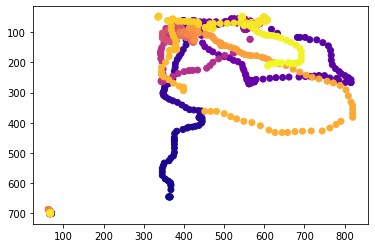

In [11]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
#plt.plot(xsnout,ysnout,'.')

#plt.plot(xsnout[:1000],ysnout[:1000],'.')
plt.scatter(xsnout[:1000],ysnout[:1000], c=Dataframe[:1000].index.values, cmap='plasma')

plt.gca().invert_yaxis() #in DLC, the upper left corner is the origin

#rect = patches.Rectangle(rois['1867_ROI'].topleft, rois['1867_ROI'].bottomright[0]-rois['1867_ROI'].topleft[0], rois['1867_ROI'].bottomright[1]-rois['1867_ROI'].topleft[1], linewidth=1, edgecolor='purple', facecolor='none')
#ax.add_patch(rect)

plt.show()

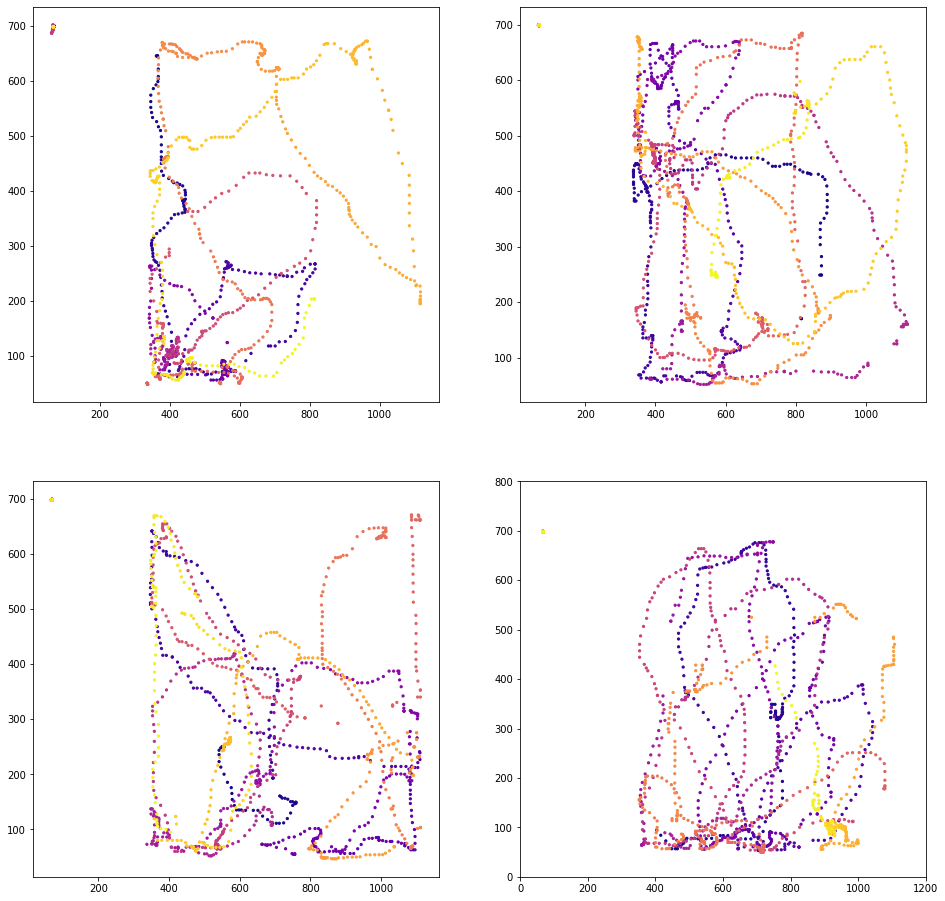

In [12]:
import math

fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2
#numRows = math.ceil(minutesTotal / numColumns)

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on

plt.show()